# Ссылка на датасет: https://universe.roboflow.com/pattern-recognition-uf7mn/projec5/dataset/1

In [ ]:
!git clone https://github.com/stefanopini/simple-HRNet.git

In [1]:
%cd simple-HRNet
%pip install -r requirements.txt

f:\test\19.04.24\simple-HRNet


f:\test\19.04.24\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


  Using cached ffmpeg_python-0.2.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached munkres-1.1.4-py2.py3-none-any.whl.metadata (980 bytes)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/61.0 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 360.3 kB/s eta 0:00:00
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached vidgear-0.3.2-py3-none-any.whl.metadata (48 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached future-1.0.0-py3-none-any.whl.me

In [12]:
!pip install scikit-image

  Using cached imageio-2.34.0-py3-none-any.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.7 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.7 MB 1.7 MB/s eta 0:00:08
   ---------------------------------------- 0.1/12.7 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.2/12.7 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.3/12.7 MB 1.7 MB/s eta 0:00:08
    --------------------------------------- 0.3/12.7 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.4/12.7 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/12.7 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.6/12.7 MB 1.9 MB/s eta 0:00:07
   - -------------------------------------- 0.6/12.7 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/12.7 MB 1.9 MB/s eta 0:00:07
   -- ------------

In [16]:
%pip install --upgrade --no-cache-dir gdown

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -------- ------------------------------- 30.7/147.9 kB 1.3 MB/s eta 0:00:01
   ---------- ---------------------------- 41.0/147.9 kB 487.6 kB/s eta 0:00:01
   ------------------------ -------------- 92.2/147.9 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 147.9/147.9 kB 976.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%cd simple-HRNet/ 
!mkdir weights 

In [24]:
%cd weights 

#!gdown 1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS

!gdown 1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38

%cd ..

f:\test\19.04.24\simple-HRNet\weights
f:\test\19.04.24\simple-HRNet


Downloading...
From (original): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38
From (redirected): https://drive.google.com/uc?id=1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38&confirm=t&uuid=aaccd65c-c106-496b-95c3-2c1b73b5dcac
To: f:\test\19.04.24\simple-HRNet\weights\pose_hrnet_w32_256x192.pth

  0%|          | 0.00/115M [00:00<?, ?B/s]
  0%|          | 524k/115M [00:00<01:21, 1.41MB/s]
  1%|          | 1.05M/115M [00:00<01:05, 1.74MB/s]
  1%|▏         | 1.57M/115M [00:01<01:13, 1.54MB/s]
  2%|▏         | 2.10M/115M [00:01<01:02, 1.79MB/s]
  2%|▏         | 2.62M/115M [00:01<01:01, 1.82MB/s]
  3%|▎         | 3.15M/115M [00:01<01:11, 1.57MB/s]
  3%|▎         | 3.67M/115M [00:02<01:07, 1.66MB/s]
  4%|▎         | 4.19M/115M [00:02<01:01, 1.81MB/s]
  4%|▍         | 4.72M/115M [00:02<01:03, 1.74MB/s]
  5%|▍         | 5.24M/115M [00:03<01:03, 1.72MB/s]
  5%|▌         | 5.77M/115M [00:03<01:06, 1.65MB/s]
  5%|▌         | 6.29M/115M [00:03<00:59, 1.82MB/s]
  6%|▌         | 6.82M/115M [00

In [34]:
import cv2
import requests 
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image 
from SimpleHRNet import SimpleHRNet

w_pth = 'F:/test/19.04.24/simple-HRNet/weights/pose_hrnet_w32_256x192.pth'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SimpleHRNet(32, 17, w_pth, yolo_version='v5', yolo_model_def='yolov5n', device=device)
url = 'F:/test/19.04.24/shrek.jpg'
image = io.imread(url)

joints = model.predict(image)

device: 'cpu'


Using cache found in C:\Users\Снежана/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-5 Python-3.10.0 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


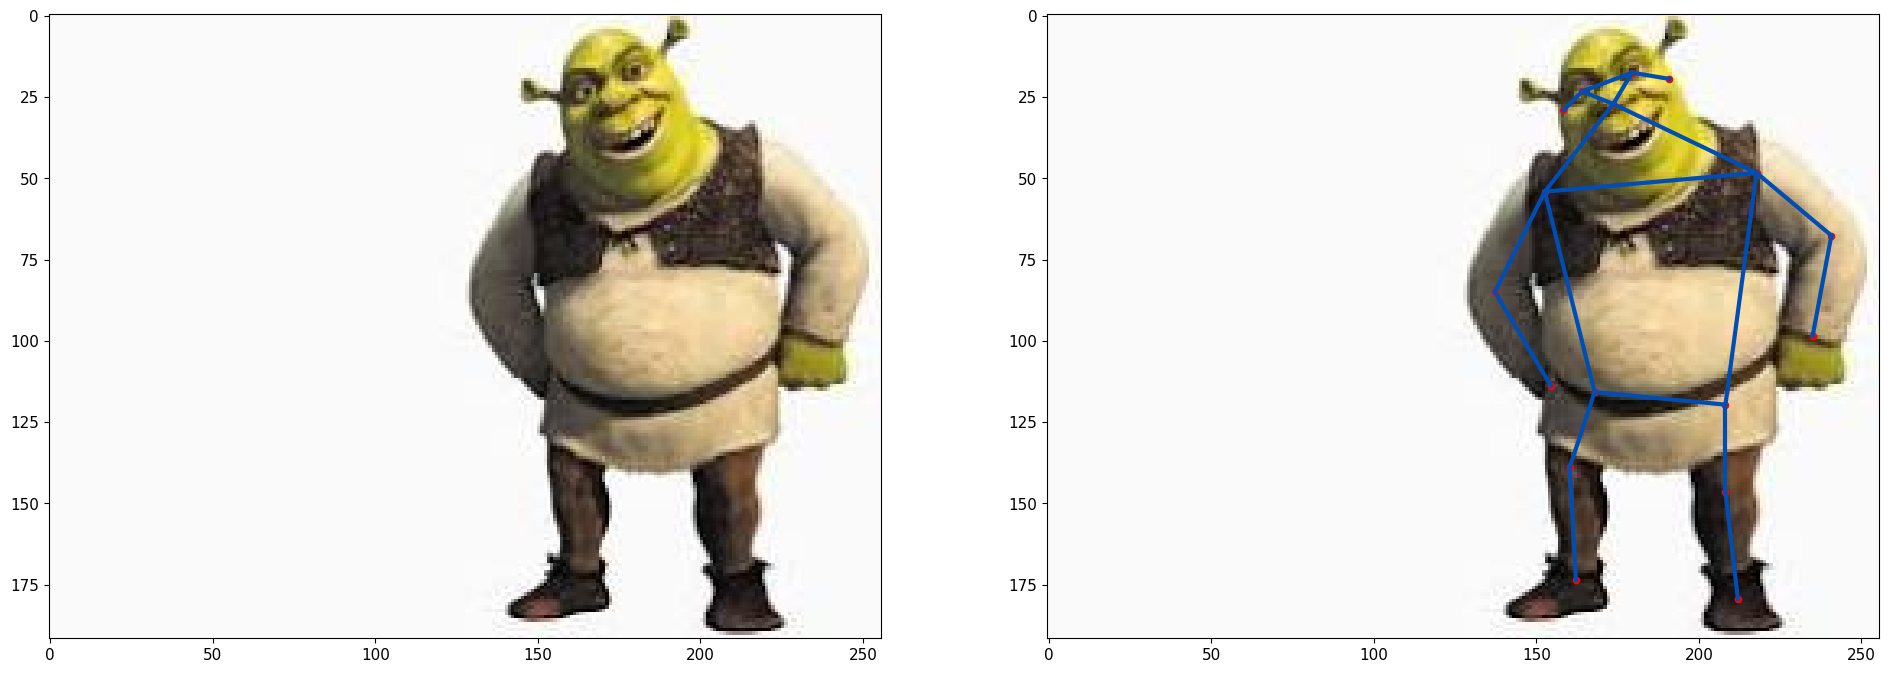

In [35]:
%matplotlib inline 
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()['coco']['skeleton']

    for bone in bones:
        xS = [output[:,bone[0],1], output[:, bone[1],1]]
        yS = [output[:,bone[0],0], output[:, bone[1],0]]
        ax.plot(xS, yS, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:, :,1], joints[:, :, 0], s=20, c='r')
    
fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(url))
ax = fig.add_subplot(122)
ax.imshow(Image.open(url))
plot_joints(ax, joints)
plt.show()

In [36]:
!pip install utils

  Using cached utils-1.0.2.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13936 sha256=b502acc90378dbff8e8fa76828297115c4aa3e2a61e850b45b17fa659364fbe0
  Stored in directory: c:\users\снежана\appdata\local\pip\cache\wheels\b8\39\f5\9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [37]:
%cd yolov5
#%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5  2024-4-5 Python-3.10.0 torch-2.2.2+cpu CPU


Setup complete  (8 CPUs, 5.9 GB RAM, 41.4/203.0 GB disk)


In [39]:
!pip install ultralytics

In [40]:
from ultralytics import YOLO

model = YOLO('yolov5/yolov5s.pt')

PRO TIP  Replace 'model=yolov5/yolov5s.pt' with new 'model=yolov5/yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:05<00:00, 3.11MB/s]


In [42]:
%cd ..

f:\test\19.04.24


In [48]:
results = model.train(data='dataset/data.yaml', epochs=5)

Ultralytics YOLOv8.2.2  Python-3.10.0 torch-2.2.2+cpu CPU (Intel Core(TM) i7-3612QM 2.10GHz)
engine\trainer: task=detect, mode=train, model=yolov5/yolov5s.pt, data=dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning F:\test\19.04.24\dataset\train\labels.cache... 38 images, 0 backgrounds, 38 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]

train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.07ad358e9240a11d9853404afc7704d4.jpg: ignoring corrupt image/label: cannot reshape array of size 7 into shape (2)
train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.193ca12b322164be3e96c4c0fa7da425.jpg: ignoring corrupt image/label: cannot reshape array of size 7 into shape (2)
train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.28608fc8d420e59792ad45a84d721b88.jpg: ignoring corrupt image/label: cannot reshape array of size 7 into shape (2)
train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.2bf8724eeab81eea258fdd1c9398bdce.jpg: ignoring corrupt image/label: cannot reshape array of size 7 into shape (2)
train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.678e1f9c3e2a3e4b2ea8fe76caadcb1f.jpg: ignoring corrupt image/label: cannot reshape array of size 7 into shape (2)
train: WARNING  F:\test\19.04.24\dataset\train\images\IMG_7637_jpg.rf.77511d4551

ValueError: not enough values to unpack (expected 3, got 0)